In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

## 1. 取出鸢尾花数据集的两个类别0和1，只取两个特征

In [116]:
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [117]:
X = X[y<2, :2]
y = y[y<2]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


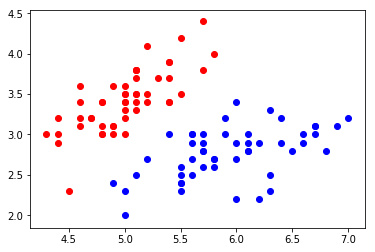

In [118]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

## 2. 使用自定义逻辑回归

In [119]:
from model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [120]:
from LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [121]:
log_reg.score(X_test, y_test)

1.0

In [122]:
log_reg.predict_prob(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [123]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [124]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## 3. 决策边界

- theta.T.dot(x) = 0
- theta0 + theta1 * x1 + theta2 * x2 = 0

In [125]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [126]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

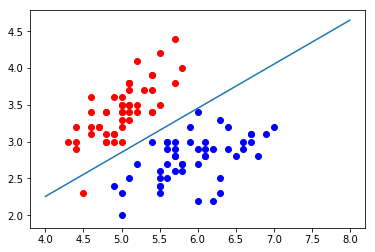

In [127]:
plt.plot(x1_plot, x2_plot)
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.show()

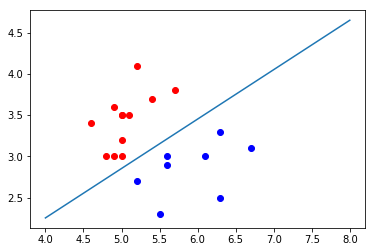

In [128]:
plt.plot(x1_plot, x2_plot)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="red")
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="blue")
plt.show()

In [129]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

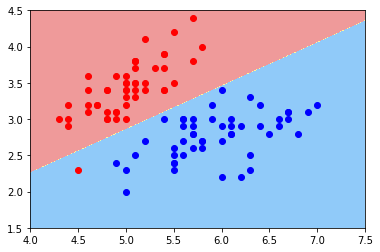

In [130]:
plot_decision_boundary(log_reg, axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.show()

### 3.1 knn决策边界

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
knn_clf.score(X_test, y_test)

1.0

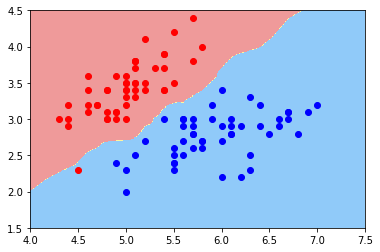

In [133]:
plot_decision_boundary(knn_clf, axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.show()

In [134]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

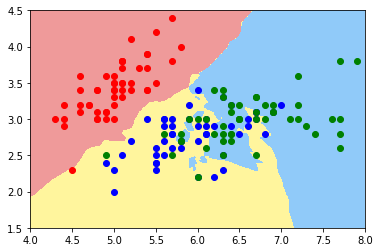

In [135]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1], color="red")
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1], color="blue")
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1], color="green")
plt.show()

In [136]:
knn_clf_all = KNeighborsClassifier(50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

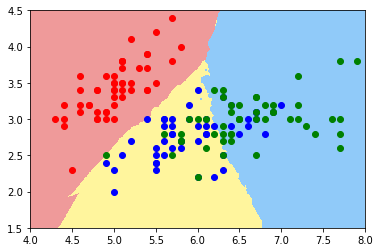

In [137]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1], color="red")
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1], color="blue")
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1], color="green")
plt.show()

## 4. 逻辑回归中使用多项式特征（使逻辑回归适用于非线性）

In [141]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5, dtype='int')
print(X.shape)
print(y.shape)

(200, 2)
(200,)


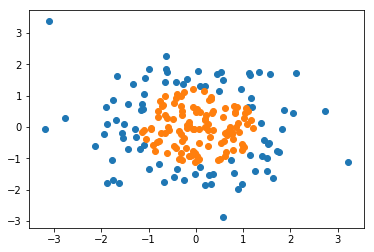

In [143]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [144]:
from LogisticRegression import LogisticRegression

In [145]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [146]:
log_reg.score(X,y)

0.605

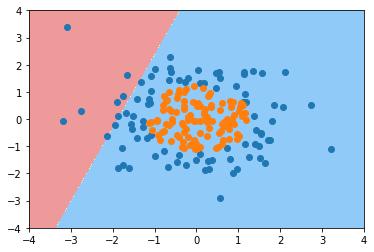

In [147]:
plot_decision_boundary(log_reg, axis=[-4,4, -4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("standar", StandardScaler()),
        ("log_reg", LogisticRegression())
    ])

In [154]:
poly_LR = PolynomialLogisticRegression(2)
poly_LR.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [155]:
poly_LR.score(X, y)

0.95

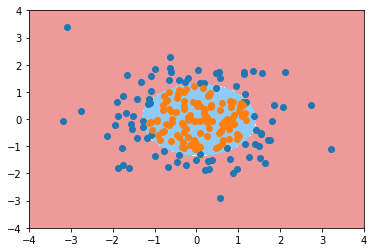

In [156]:
plot_decision_boundary(poly_LR, axis=[-4,4, -4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [157]:
poly_LR20 = PolynomialLogisticRegression(20)
poly_LR20.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

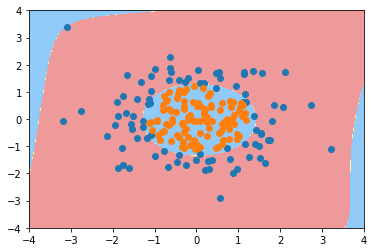

In [158]:
plot_decision_boundary(poly_LR20, axis=[-4,4, -4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 5. scikit-learn中的逻辑回归
- 逻辑回归中使用多项式特征所产生的的过拟合问题
- sklearn提供了正则化

In [161]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1] < 0.5, dtype='int')

for _ in range(20):
    y[np.random.randint(200)] = 1

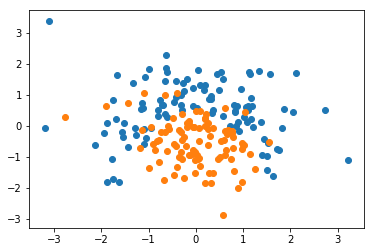

In [162]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [169]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- C : C*J + Lp
- penalty : l2 -> Lp = L2

In [171]:
log_reg.score(X_train, y_train)

0.6866666666666666

In [172]:
log_reg.score(X_test, y_test)

0.76

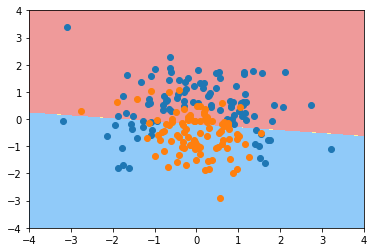

In [173]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("standar", StandardScaler()),
        ("log_reg", LogisticRegression())
    ])

In [175]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [176]:
poly_log_reg.score(X_train, y_train)

0.88

In [177]:
poly_log_reg.score(X_test, y_test)

0.88

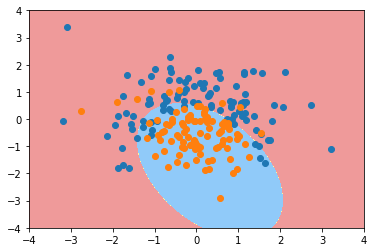

In [178]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [179]:
poly_log_reg20 = PolynomialLogisticRegression(degree=20)
poly_log_reg20.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [180]:
poly_log_reg20.score(X_train,y_train)

0.92

In [181]:
poly_log_reg20.score(X_test, y_test)

0.82

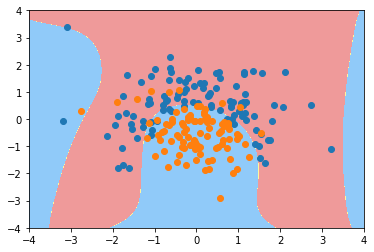

In [182]:
plot_decision_boundary(poly_log_reg20, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("standar", StandardScaler()),
        ("log_reg", LogisticRegression(C=C))
    ])

In [184]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)

In [186]:
poly_log_reg3.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [188]:
poly_log_reg3.score(X_train, y_train)

0.9

In [189]:
poly_log_reg3.score(X_test, y_test)

0.84

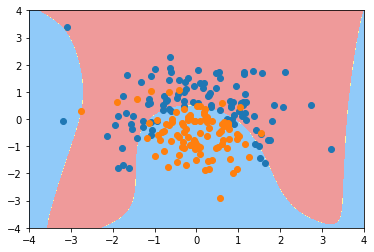

In [190]:
plot_decision_boundary(poly_log_reg3, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("standar", StandardScaler()),
        ("log_reg", LogisticRegression(C=C, penalty=penalty))
    ])

In [192]:
poly_log_reg4 = PolynomialLogisticRegression(20, 0.1, 'l1')

In [193]:
poly_log_reg4.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('standar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [194]:
poly_log_reg4.score(X_train, y_train)

0.8533333333333334

In [196]:
poly_log_reg4.score(X_test, y_test)

0.86

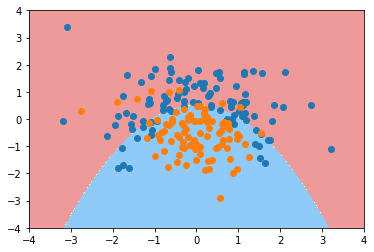

In [197]:
plot_decision_boundary(poly_log_reg4, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 6. 逻辑回归解决多分类问题
- OvR (One vs Rest) n个类别需要进行n此分类
- OvO (One vs One)  n个类别就进行C(n,2)次分类，选择赢次数最高的分类

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 6.1 使用OvR

In [203]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()                # OvR
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [204]:
log_reg.score(X_test, y_test)

0.7894736842105263

In [205]:
log_reg.score(X_train, y_train)

0.7232142857142857

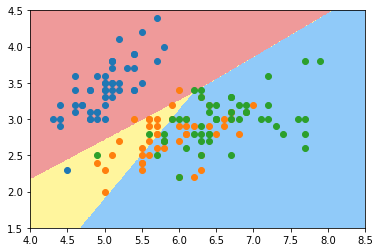

In [207]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 6.2 使用ovo更加准确

In [209]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")     # OvO
log_reg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
log_reg2.score(X_test, y_test)

0.8947368421052632

In [211]:
log_reg2.score(X_train, y_train)

0.8035714285714286

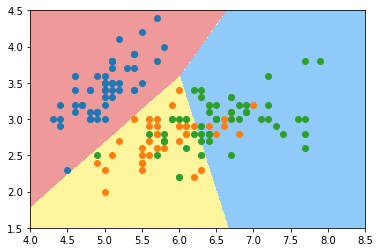

In [212]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 6.3 使用所有数据

In [213]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [214]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9464285714285714

In [215]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg2.fit(X_train, y_train)
log_reg2.score(X_train, y_train)

0.9732142857142857

In [216]:
log_reg2.score(X_test, y_test)

1.0

### 6.4 OvO and OvR

In [217]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [218]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0